In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# 폰트 설정 방법 2
import matplotlib as plt
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

font_location = r'C:\Windows\Fonts\H2HDRM.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

In [3]:
all_data = pd.read_csv( r'OSSP_final_data_filled_with_knn_with_LABEL.csv', encoding = 'cp949' )
all_data

,Unnamed: 0,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,상권코드_6,...,상권코드_1495,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,0,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,90544.00,14.48,82.27,294285315.61,24.00,52.00,167195866008.00,15904.00,2.59
1,1,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3026454.00,22.00,89.00,527347107.00,8221.00,242.00,154618103600.00,24375.00,3.03
2,2,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,4033679.00,5.00,39.00,112097903.00,1924.00,327.00,259239790301.00,32935.00,2.08
3,3,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3262023.00,8.00,53.00,237967427.00,2427.00,165.00,246639327198.00,6054.00,2.11
4,4,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3764785.00,14.48,82.27,294285315.61,1104.00,593.00,376621394364.00,104830.00,2.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,32907,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,44865.00,1.00,49.00,71085714.00,108.00,37.77,866169014.00,488.03,5.56
32908,32908,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,68009.00,14.48,82.27,294285315.61,15.00,2.00,2782281551.00,435.34,0.00
32909,32909,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,270623.00,14.48,82.27,294285315.61,162.00,2.00,4617167080.00,440.34,1.49
32910,32910,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,56866.00,14.48,82.27,294285315.61,52.00,2.00,2625742576.00,438.65,0.00


In [4]:
all_data = all_data.drop(['Unnamed: 0'], axis=1)
all_data

,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,상권코드_6,상권코드_7,...,상권코드_1495,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,90544.00,14.48,82.27,294285315.61,24.00,52.00,167195866008.00,15904.00,2.59
1,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3026454.00,22.00,89.00,527347107.00,8221.00,242.00,154618103600.00,24375.00,3.03
2,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,4033679.00,5.00,39.00,112097903.00,1924.00,327.00,259239790301.00,32935.00,2.08
3,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3262023.00,8.00,53.00,237967427.00,2427.00,165.00,246639327198.00,6054.00,2.11
4,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3764785.00,14.48,82.27,294285315.61,1104.00,593.00,376621394364.00,104830.00,2.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,44865.00,1.00,49.00,71085714.00,108.00,37.77,866169014.00,488.03,5.56
32908,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,68009.00,14.48,82.27,294285315.61,15.00,2.00,2782281551.00,435.34,0.00
32909,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,270623.00,14.48,82.27,294285315.61,162.00,2.00,4617167080.00,440.34,1.49
32910,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,56866.00,14.48,82.27,294285315.61,52.00,2.00,2625742576.00,438.65,0.00


# 1496 상권별로 분기별 폐업률 요인을 확인할 것이므로, 원 핫 임베딩 대신에 기존의 상권 코드로 변경 후, groupby로 상권을 특정함.

In [5]:
ba_code = all_data.iloc[:,2:1498]
ba_code

,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,상권코드_6,상권코드_7,상권코드_8,상권코드_9,...,상권코드_1486,상권코드_1487,상권코드_1488,상권코드_1489,상권코드_1490,상권코드_1491,상권코드_1492,상권코드_1493,상권코드_1494,상권코드_1495
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
32908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
32909,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
32910,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [6]:
df = []

for i in range(0,32912):
    for j in range(0,1496):
        if (ba_code.iloc[i,j]==1):
            df.append(j+1)
            continue
df    

[1496,
 1495,
 1494,
 1493,
 1492,
 1491,
 1490,
 1489,
 1488,
 1487,
 1486,
 1484,
 1483,
 1482,
 1481,
 1480,
 1479,
 1478,
 1477,
 1476,
 1475,
 1474,
 1473,
 1472,
 1471,
 1470,
 1469,
 1468,
 1467,
 1466,
 1463,
 1462,
 1461,
 1460,
 1459,
 1458,
 1457,
 1455,
 1454,
 1453,
 1452,
 1451,
 1450,
 1449,
 1448,
 1447,
 1446,
 1445,
 1444,
 1442,
 1441,
 1440,
 1439,
 1438,
 1436,
 1435,
 1433,
 1432,
 1431,
 1430,
 1429,
 1428,
 1427,
 1426,
 1425,
 1424,
 1423,
 1422,
 1421,
 1420,
 1418,
 1417,
 1415,
 1414,
 1413,
 1412,
 1411,
 1410,
 1409,
 1408,
 1406,
 1405,
 1404,
 1403,
 1402,
 1400,
 1399,
 1398,
 1397,
 1396,
 1395,
 1394,
 1393,
 1392,
 1391,
 1390,
 1388,
 1387,
 1386,
 1385,
 1384,
 1383,
 1382,
 1381,
 1380,
 1379,
 1378,
 1377,
 1376,
 1375,
 1374,
 1373,
 1372,
 1371,
 1370,
 1369,
 1368,
 1367,
 1366,
 1365,
 1364,
 1363,
 1362,
 1361,
 1360,
 1359,
 1358,
 1357,
 1356,
 1355,
 1354,
 1353,
 1352,
 1351,
 1350,
 1349,
 1348,
 1347,
 1345,
 1343,
 1342,
 1341,
 1340,

In [7]:
_ba_code = pd.DataFrame({'ba_code' : df })
_ba_code

,ba_code
0,1496
1,1495
2,1494
3,1493
4,1492
...,...
32907,1443
32908,1456
32909,1464
32910,1465


In [8]:
all_data_ba = pd.concat( [all_data, _ba_code],axis=1)
all_data_ba

,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,상권코드_6,상권코드_7,...,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,ba_code
0,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,90544.00,14.48,82.27,294285315.61,24.00,52.00,167195866008.00,15904.00,2.59,1496
1,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3026454.00,22.00,89.00,527347107.00,8221.00,242.00,154618103600.00,24375.00,3.03,1495
2,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4033679.00,5.00,39.00,112097903.00,1924.00,327.00,259239790301.00,32935.00,2.08,1494
3,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3262023.00,8.00,53.00,237967427.00,2427.00,165.00,246639327198.00,6054.00,2.11,1493
4,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3764785.00,14.48,82.27,294285315.61,1104.00,593.00,376621394364.00,104830.00,2.16,1492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,44865.00,1.00,49.00,71085714.00,108.00,37.77,866169014.00,488.03,5.56,1443
32908,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,68009.00,14.48,82.27,294285315.61,15.00,2.00,2782281551.00,435.34,0.00,1456
32909,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,270623.00,14.48,82.27,294285315.61,162.00,2.00,4617167080.00,440.34,1.49,1464
32910,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,56866.00,14.48,82.27,294285315.61,52.00,2.00,2625742576.00,438.65,0.00,1465


In [ ]:
for i in range(0,1496):
    all_data_ba = all_data_ba.drop(['상권코드_'+str(i)], axis=1)

In [15]:
all_data_ba

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,ba_code
0,2020.00,2.00,90544.00,14.48,82.27,294285315.61,24.00,52.00,167195866008.00,15904.00,2.59,1496
1,2020.00,2.00,3026454.00,22.00,89.00,527347107.00,8221.00,242.00,154618103600.00,24375.00,3.03,1495
2,2020.00,2.00,4033679.00,5.00,39.00,112097903.00,1924.00,327.00,259239790301.00,32935.00,2.08,1494
3,2020.00,2.00,3262023.00,8.00,53.00,237967427.00,2427.00,165.00,246639327198.00,6054.00,2.11,1493
4,2020.00,2.00,3764785.00,14.48,82.27,294285315.61,1104.00,593.00,376621394364.00,104830.00,2.16,1492
...,...,...,...,...,...,...,...,...,...,...,...,...
32907,2020.00,2.00,44865.00,1.00,49.00,71085714.00,108.00,37.77,866169014.00,488.03,5.56,1443
32908,2020.00,2.00,68009.00,14.48,82.27,294285315.61,15.00,2.00,2782281551.00,435.34,0.00,1456
32909,2020.00,2.00,270623.00,14.48,82.27,294285315.61,162.00,2.00,4617167080.00,440.34,1.49,1464
32910,2020.00,2.00,56866.00,14.48,82.27,294285315.61,52.00,2.00,2625742576.00,438.65,0.00,1465


# 총 유동인구 수, 아파트 단지 수, ... , 총 직장 인구 수 칼럼을 min-Max 정규화

In [16]:
all_data_ba['총_유동인구_수']

0         90544.00
1       3026454.00
2       4033679.00
3       3262023.00
4       3764785.00
           ...    
32907     44865.00
32908     68009.00
32909    270623.00
32910     56866.00
32911    105874.00
Name: 총_유동인구_수, Length: 32912, dtype: float64

In [18]:
import pandas as pd
from sklearn import preprocessing

x = all_data_ba['총_유동인구_수'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(pd.DataFrame(x))
df = pd.DataFrame(x_scaled)
df

,0
0,0.01
1,0.31
2,0.41
3,0.33
4,0.38
...,...
32907,0.00
32908,0.01
32909,0.03
32910,0.01


In [23]:
all_data_ba_col = all_data_ba.columns
all_data_ba_col

Index(['기준_년_코드', '기준_분기_코드', '총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가',
       '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수', '폐업률', 'ba_code'],
      dtype='object')

# 2,3,4,5,6,7,8,9 -> min-Max 정규화 대상

In [24]:
for i in range(2,10):
    x = all_data_ba[all_data_ba_col[i]].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(pd.DataFrame(x))
    
    # min_Max 적용
    all_data_ba[all_data_ba_col[i]] = pd.DataFrame(x_scaled)

In [25]:
all_data_ba

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,ba_code
0,2020.00,2.00,0.01,0.03,0.29,0.12,0.00,0.09,0.26,0.09,2.59,1496
1,2020.00,2.00,0.31,0.04,0.31,0.22,0.50,0.41,0.24,0.14,3.03,1495
2,2020.00,2.00,0.41,0.01,0.14,0.05,0.12,0.55,0.40,0.19,2.08,1494
3,2020.00,2.00,0.33,0.01,0.18,0.10,0.15,0.28,0.38,0.03,2.11,1493
4,2020.00,2.00,0.38,0.03,0.29,0.12,0.07,1.00,0.58,0.60,2.16,1492
...,...,...,...,...,...,...,...,...,...,...,...,...
32907,2020.00,2.00,0.00,0.00,0.17,0.03,0.01,0.06,0.00,0.00,5.56,1443
32908,2020.00,2.00,0.01,0.03,0.29,0.12,0.00,0.00,0.00,0.00,0.00,1456
32909,2020.00,2.00,0.03,0.03,0.29,0.12,0.01,0.00,0.01,0.00,1.49,1464
32910,2020.00,2.00,0.01,0.03,0.29,0.12,0.00,0.00,0.00,0.00,0.00,1465


In [31]:
x = all_data_ba.groupby(['ba_code']).get_group((1496))
x

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,ba_code
0,2020.00,2.00,0.01,0.03,0.29,0.12,0.00,0.09,0.26,0.09,2.59,1496
1475,2020.00,1.00,0.01,0.02,0.34,0.21,0.00,0.09,0.24,0.09,3.64,1496
2950,2019.00,4.00,0.01,0.05,0.24,0.09,0.00,0.09,0.34,0.09,2.03,1496
4425,2019.00,3.00,0.01,0.03,0.22,0.09,0.00,0.09,0.27,0.11,1.98,1496
5918,2019.00,2.00,0.01,0.02,0.30,0.19,0.00,0.09,0.27,0.11,3.06,1496
7411,2019.00,1.00,0.01,0.04,0.27,0.14,0.00,0.09,0.26,0.15,2.07,1496
8903,2018.00,4.00,0.01,0.07,0.23,0.12,0.00,0.09,0.27,0.13,3.19,1496
10246,2018.00,3.00,0.01,0.04,0.26,0.15,0.00,0.09,0.25,0.13,3.67,1496
11589,2018.00,2.00,0.01,0.08,0.23,0.10,0.00,0.09,0.23,0.13,4.19,1496
12932,2018.00,1.00,0.00,0.06,0.25,0.12,0.00,0.09,0.23,0.13,3.87,1496


In [35]:
x_in = x[['기준_년_코드', '기준_분기_코드', '총_유동인구_수', 
          '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가',
          '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수']]

x_out = x['폐업률']

In [56]:
x_out

0       2.59
1475    3.64
2950    2.03
4425    1.98
5918    3.06
7411    2.07
8903    3.19
10246   3.67
11589   4.19
12932   3.87
14273   2.13
15614   3.51
16957   2.35
18300   2.49
19643   1.89
20986   2.33
22329   2.61
23672   5.15
25013   3.16
26354   3.99
27693   2.69
29032   4.27
Name: 폐업률, dtype: float64

In [48]:
import xgboost as xgb
hr_dmatrix = xgb.DMatrix(data=x_in, label=x_out)

cv_params = {"objective":'reg:squarederror', 
             "n_estimators": 100, 
             "max_depth":6}

hr_cv = xgb.cv(dtrain=hr_dmatrix, 
               params=cv_params, 
               nfold=7, 
               num_boost_round=10, 
               metrics="rmse", 
               as_pandas=True)

hr_cv

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2.00,0.08,1.93,0.62
1,1.51,0.06,1.54,0.66
2,1.16,0.05,1.25,0.66
3,0.90,0.04,1.12,0.57
4,0.70,0.04,1.04,0.51
5,0.55,0.03,0.97,0.46
6,0.44,0.03,0.92,0.42
7,0.36,0.03,0.90,0.38
8,0.29,0.03,0.88,0.36
9,0.24,0.03,0.87,0.35


In [87]:
from sklearn.model_selection import train_test_split
X, y = x_in, pd.DataFrame(x_out)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
import time
from xgboost import XGBRegressor
start = time.time()  # 시작 시간 저장

xgb_50 = XGBRegressor(objective ='reg:squarederror', n_estimators=10000, learning_rate=0.005 ,
                      max_depth=8, n_jobs = -1, gamma=0, subsample=0.75, colsample_bytree=1,)
xgb_50.fit(X_train,y_train)
xgb_50_pred = xgb_50.predict(X_test)
# 218분 약 3시간 반 걸림.
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

time : 5.9043755531311035


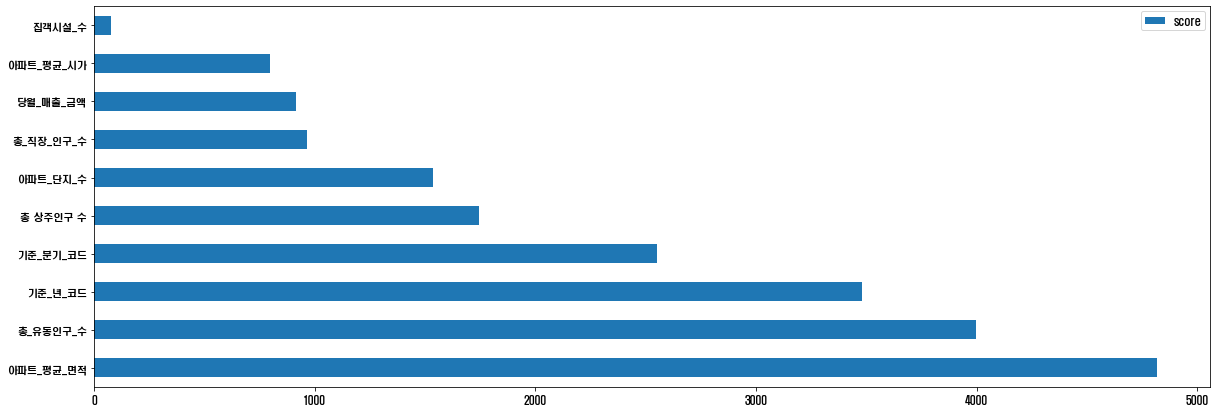

In [95]:
feature_important = xgb_50.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
plt.rcParams["figure.figsize"] = (20,7)
data_50 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_50[:].plot(kind='barh')

In [96]:
xgb_50_pred

array([3.0583446, 2.601739 , 3.526216 , 3.5895536, 2.4327586],
      dtype=float32)

In [97]:
y_test

,폐업률
0,2.59
18300,2.49
11589,4.19
1475,3.64
20986,2.33
